In [26]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import pandas as pd

In [27]:
all_game_df = pd.read_csv('all_game_data.csv')
all_game_df.drop(['home', 'away','week'], axis=1, inplace=True)

scaler = MinMaxScaler()

df_scaled = pd.DataFrame(scaler.fit_transform(all_game_df), columns=all_game_df.columns)

df_scaled.head()

,home_pass,away_pass,home_rush,away_rush,home_points,away_points,home_turnover,away_turnover,home_win
0,0.347826,0.121479,0.578225,0.548404,0.377778,0.119681,0.520548,0.493151,1.0
1,0.375494,0.548239,0.464209,0.487234,0.155556,0.348404,0.534247,0.520548,0.0
2,0.739849,0.566549,0.363052,0.494149,0.475000,0.329787,0.643836,0.493151,0.0
3,0.929572,0.472183,0.512216,0.430319,0.750000,0.194149,0.493151,0.328767,0.0
4,0.573482,0.615845,0.522503,0.513298,0.408333,0.390957,0.506849,0.397260,0.0


In [28]:
home_win_df = df_scaled.pop('home_win')

In [29]:
home_win_df.head()

0    1.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: home_win, dtype: float64

In [30]:
df_scaled.head()

,home_pass,away_pass,home_rush,away_rush,home_points,away_points,home_turnover,away_turnover
0,0.347826,0.121479,0.578225,0.548404,0.377778,0.119681,0.520548,0.493151
1,0.375494,0.548239,0.464209,0.487234,0.155556,0.348404,0.534247,0.520548
2,0.739849,0.566549,0.363052,0.494149,0.475000,0.329787,0.643836,0.493151
3,0.929572,0.472183,0.512216,0.430319,0.750000,0.194149,0.493151,0.328767
4,0.573482,0.615845,0.522503,0.513298,0.408333,0.390957,0.506849,0.397260


In [31]:
X_train, X_test, y_train, y_test = train_test_split(df_scaled, home_win_df, test_size=0.2, random_state=4)

In [32]:
print(X_train.shape)
print(X_test.shape)

(192, 8)
(48, 8)


In [33]:
print(y_train.shape)
print(y_test.shape)

(192,)
(48,)


In [34]:
k_range = range(1,26)
scores = {}
scores_list = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores[k] = metrics.accuracy_score(y_test, y_pred)
    scores_list.append(metrics.accuracy_score(y_test, y_pred))

Text(0, 0.5, 'Testing Accuracy')

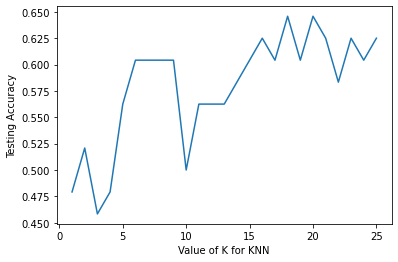

In [35]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(k_range, scores_list)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

In [36]:
# Final baseline model
knn = KNeighborsClassifier(n_neighbors=18)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=18)

In [37]:
# Show accuracy on test set
y_pred = knn.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.6458333333333334
